In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
plt.style.use('Solarize_Light2')
import statistics
import talib as ta
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor as RF
import warnings
import math
from markovitz_utils import *
from pandas.core.common import SettingWithCopyWarning
import scipy.optimize as sco
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', 50)


In [2]:
# Input values

ave_trading_days = 252
ds = input("Where is the dataframe located?: ") or "Crypto data.csv"
Top_coins = int(input("Enter the top number of coins desired to look at e.g. 50: ") or "50")
Number_of_iterations = int(input("Enter number of modelling iterations e.g. 15: ") or "15")
back_date = input("What date do you want to run the model from e.g. : '2019-07-18' ") or '2019-07-18'
df2 = pd.read_csv(ds) # Importing dataset
d = int(input("What value is the asset return?: ") or "0")
top_50=df2[df2['Date']== back_date ].nlargest(Top_coins, 'Market Cap')["Symbol"].to_list() #get 50 crypto for market cap at the beginning of the timeseries
 

Where is the dataframe located?:  
Enter the top number of coins desired to look at e.g. 50:  
Enter number of modelling iterations e.g. 15:  
What date do you want to run the model from e.g. : '2019-07-18'  
What value is the asset return?:  


Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 3.55
Annualised Volatility: 0.31
Sharpe Ratio: 11 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX   ADA  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.09  0.0  0.31   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0  9.49  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

              CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  17.42  0.0  14.39   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   

              OMG   HT   BTT  PAX  HEDG  RVN   HOT  LSK  BCD  WAVES  NANO  \
allocation  38.57  0.0  0.79  0.0   0.0  0.0  2.39  0.0  0.0    0.0   0.0   

            KMD    DGB   ZRX  
allocation  0.0  12.99  2.55  
--------------------------------------------------------------------------------
Minimum Volatilit

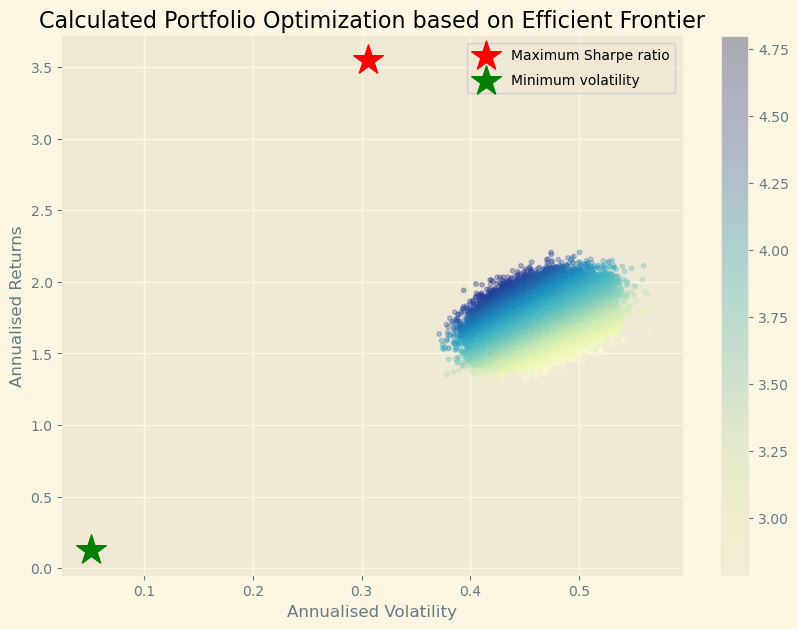

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 3.07
Annualised Volatility: 0.34
Sharpe Ratio: 9 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM  TRX   ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  3.07  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT    CRO  \
allocation   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  45.18   

            BTG  USDC  VSYS  DOGE  EGT   VET  BAT  QTUM  DCR  TUSD    OMG  \
allocation  0.0   0.0   0.0   0.0  0.0  3.08  0.0   0.0  0.0   0.0  11.11   

             HT  BTT  PAX  HEDG  RVN   HOT  LSK  BCD  WAVES  NANO   KMD   DGB  \
allocation  0.0  0.0  0.0   0.0  0.0  2.43  0.0  0.0    0.0  21.0  0.45  4.17   

            ZRX  
allocation  9.5  
--------------------------------------------------------------------------------
Minimum Volatility Portf

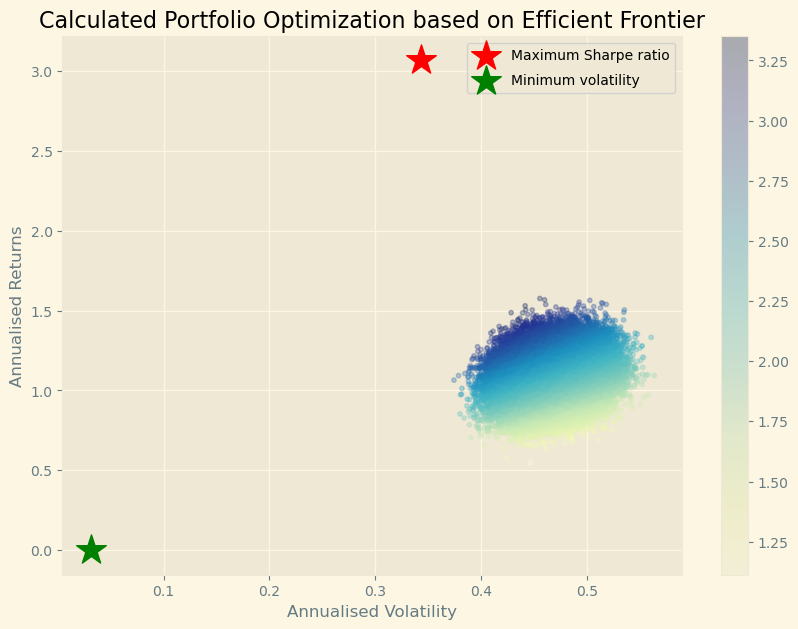

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.04
Annualised Volatility: 0.25
Sharpe Ratio: 8 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  2.94  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR   ZEC   ONT  CRO  \
allocation   0.0   0.0  0.0   1.23   0.0  0.0  0.0  0.0  4.7  3.08  2.37  0.0   

            BTG  USDC  VSYS  DOGE   EGT    VET  BAT   QTUM  DCR  TUSD   OMG  \
allocation  0.0   0.0   0.0   0.0  6.24  18.58  0.0  31.56  0.0   0.0  0.01   

             HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  DGB  \
allocation  0.0  0.0  11.43   0.0  0.0  0.0  0.0  9.0    0.0   0.0  0.0  0.0   

             ZRX  
allocation  8.86  
--------------------------------------------------------------------------------
Minimum Volatility P

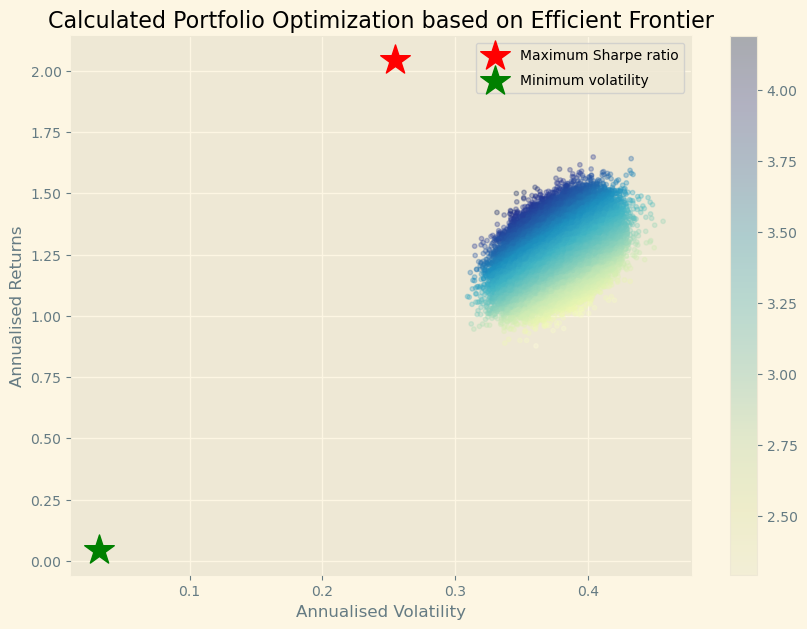

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.06
Annualised Volatility: 0.12
Sharpe Ratio: 8 2


            BTC  ETH   XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM   TRX  ADA  \
allocation  0.0  0.0  4.84  0.0  0.0  0.0   0.0  0.0  0.0  0.0  6.35  0.0   

            XMR  DASH  LINK  NEO  MIOTA   ATOM  ETC  XTZ   XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0  15.23  0.0  0.0  1.68  0.0  0.0  0.0   

            CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  OMG  \
allocation  0.0  0.0   0.0   0.0   0.0  1.9  0.0  0.0   0.0  0.0   0.0  0.0   

             HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD   DGB  \
allocation  0.0  0.0  57.17   9.9  0.0  0.0  0.0  0.0    2.2   0.0  0.0  0.22   

             ZRX  
allocation  0.52  
--------------------------------------------------------------------------------
Minimum Volatility Portfol

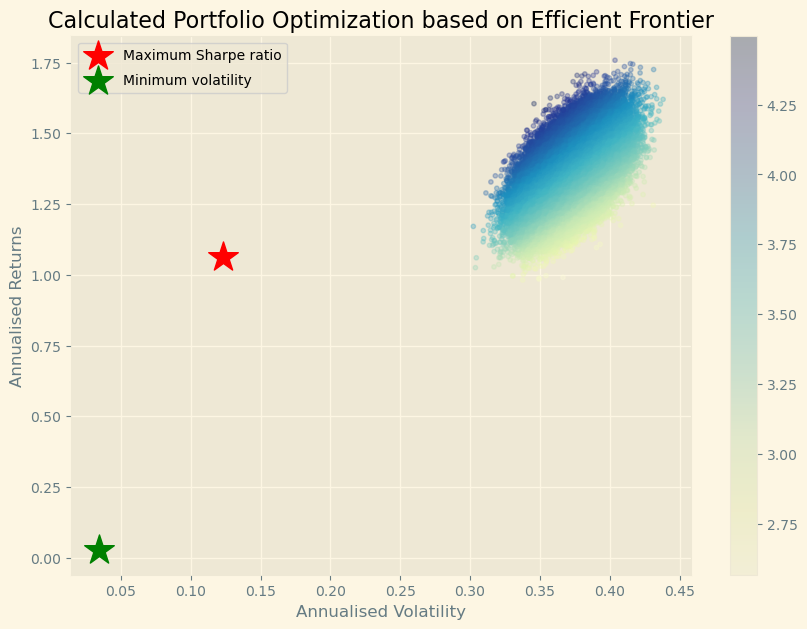

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.08
Sharpe Ratio: 7 2


            BTC   ETH  XRP  LTC  BCH   BNB  USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  0.0  1.97  0.0  0.0  0.0  0.81   0.0  0.0  0.0  0.0  0.0  0.0   

             XMR  DASH  LINK   NEO  MIOTA  ATOM  ETC  XTZ   XEM  MKR  ZEC  \
allocation  0.37   0.0   0.0  5.63    0.0   0.0  0.0  0.0  2.55  0.0  0.0   

            ONT  CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  0.0  0.0  0.0  13.04   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   

             OMG   HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  1.96  0.0  0.0  71.57   0.0  0.0  0.0  0.0  0.0   2.08   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfo

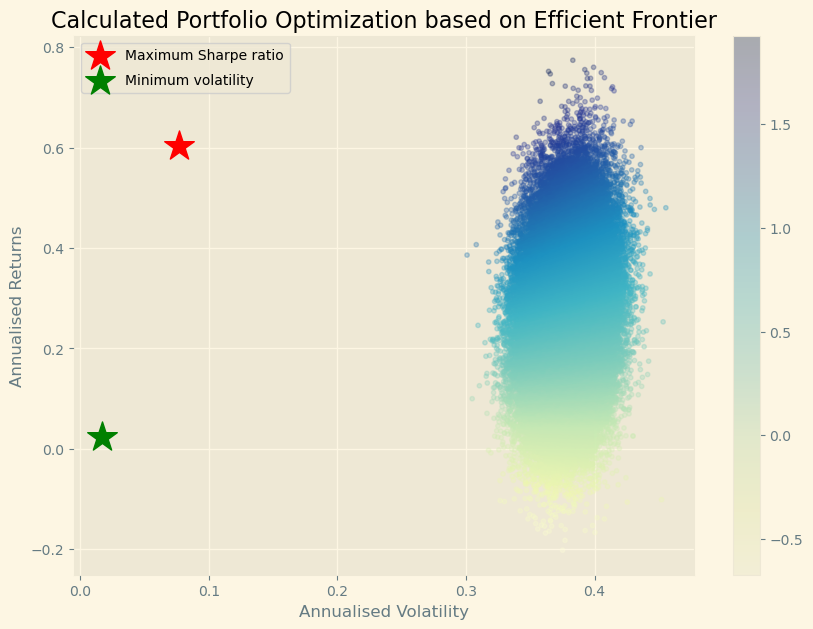

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.32
Annualised Volatility: 0.12
Sharpe Ratio: 2 2


            BTC  ETH  XRP  LTC  BCH   BNB  USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  0.0  0.0  0.0  0.0  0.0  9.48   0.0  0.0  0.0  0.0  0.0  0.0   

             XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ    XEM  MKR  ZEC  \
allocation  5.89   0.0   0.0  0.0    0.0   0.0  0.0  0.0  11.38  0.0  0.0   

            ONT  CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  0.0  0.0  0.0  73.26   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   

            OMG   HT  BTT  PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio All

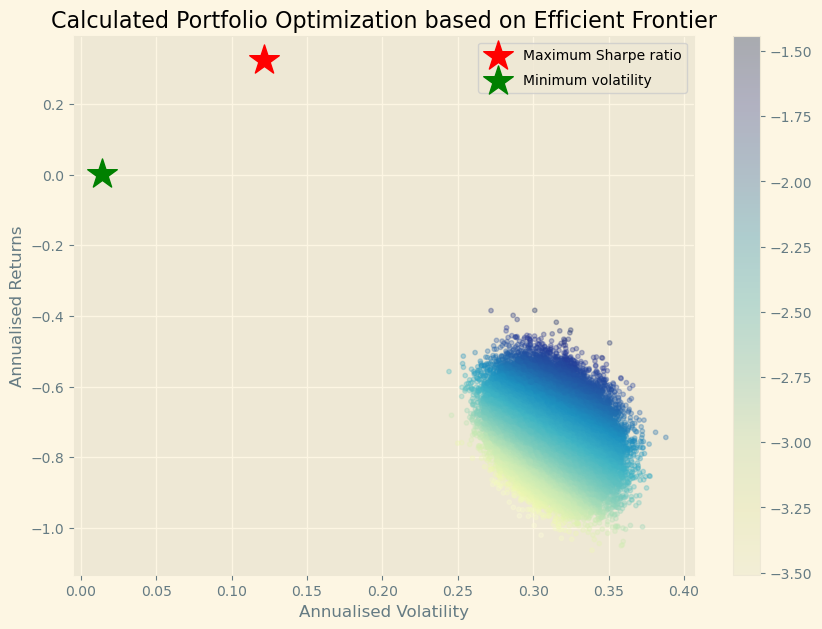

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.33
Annualised Volatility: 0.05
Sharpe Ratio: 6 2


             BTC  ETH   XRP  LTC  BCH  BNB  USDT  EOS   BSV  XLM  TRX  ADA  \
allocation  5.04  0.0  1.13  0.9  0.0  0.0  6.86  0.0  0.56  0.0  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0  1.22  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            CRO  BTG   USDC  VSYS  DOGE   EGT  VET  BAT  QTUM   DCR  TUSD  \
allocation  0.0  0.0  77.16   0.4   0.0  0.75  0.0  0.0   0.0  0.84   0.0   

            OMG   HT  BTT  PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  0.0  0.0  0.87  0.0  0.0  0.0  0.0   4.26   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio A

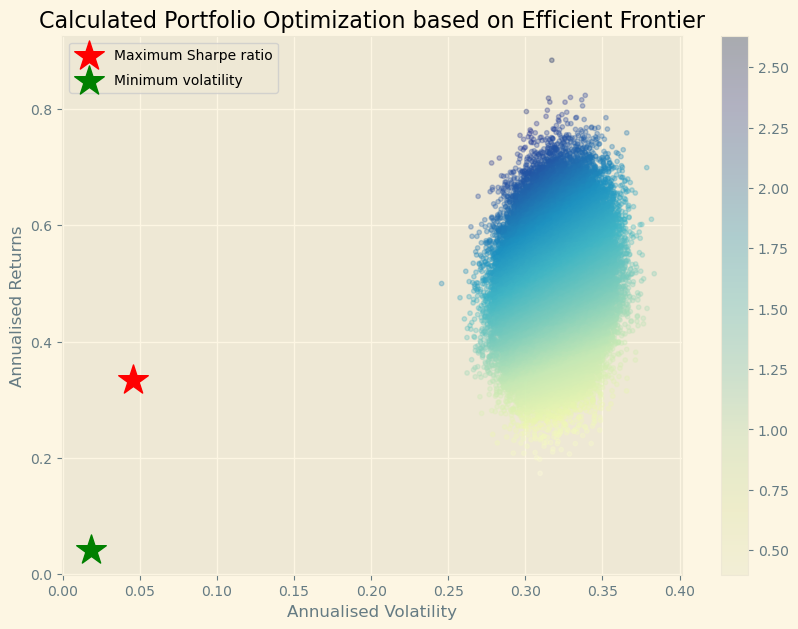

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.2
Annualised Volatility: 0.12
Sharpe Ratio: 10 2


            BTC   ETH   XRP   LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX  ADA  \
allocation  0.0  0.33  1.91  2.74  0.0  0.0  1.11  0.0  0.0  0.29  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ   XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  0.0  0.0  4.89  0.0  0.0  0.0   

            CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM    DCR   TUSD  \
allocation  0.0  0.0  13.99  1.08   0.0  0.0  0.0  0.0   0.0  16.78  55.78   

            OMG   HT  BTT  PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0    1.1   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portf

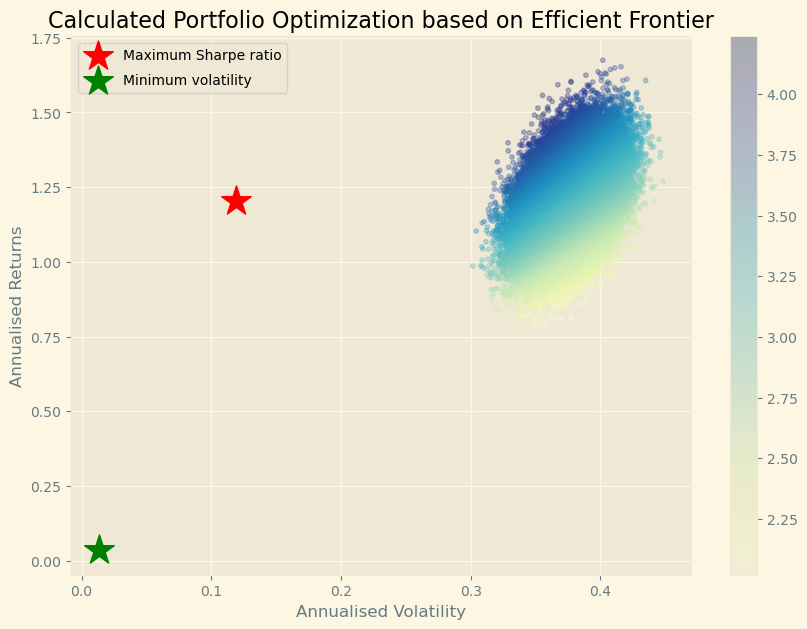

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.0
Annualised Volatility: 0.16
Sharpe Ratio: 12 2


            BTC   ETH   XRP  LTC  BCH  BNB   USDT  EOS  BSV   XLM  TRX  ADA  \
allocation  0.0  6.21  1.44  0.0  0.0  0.0  16.85  0.0  0.0  2.07  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

             CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM    DCR  TUSD  \
allocation  6.45  0.0   0.0   2.0  2.22  0.0  0.0  0.0   0.0  26.08   0.0   

            OMG   HT  BTT    PAX  HEDG  RVN   HOT  LSK  BCD  WAVES  NANO  \
allocation  0.0  0.0  0.0  29.81  2.75  0.0  1.87  0.0  0.0   0.09   0.0   

             KMD  DGB  ZRX  
allocation  2.17  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility P

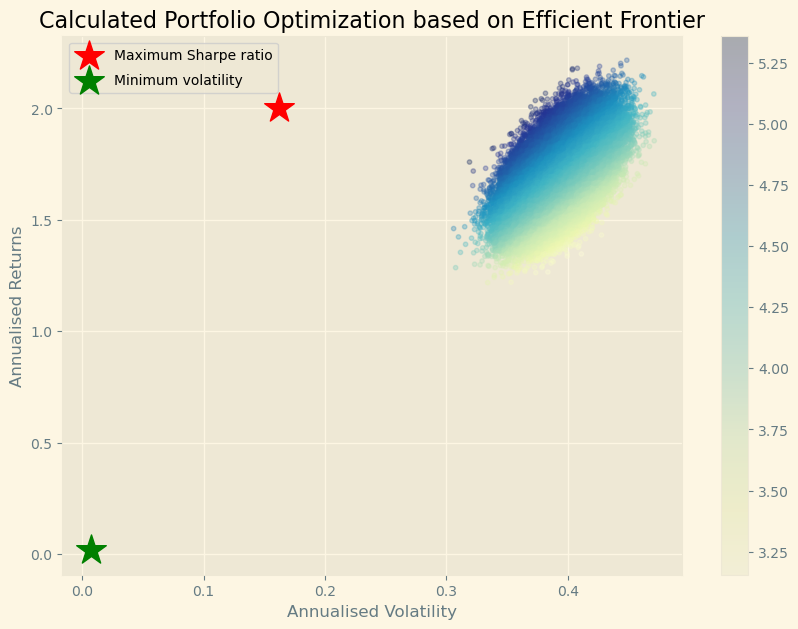

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 4.03
Annualised Volatility: 0.32
Sharpe Ratio: 13 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  7.21  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  CRO  \
allocation   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BTG  USDC  VSYS  DOGE   EGT  VET  BAT  QTUM    DCR  TUSD  OMG  \
allocation  0.0   0.0   0.0  8.59  7.28  0.0  0.0   0.0  20.61   0.0  0.0   

             HT  BTT   PAX   HEDG   RVN   HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  21.5  10.86  6.46  0.95  0.0  0.0    0.0  1.58  0.0   

            DGB    ZRX  
allocation  0.0  14.95  
--------------------------------------------------------------------------------
Minimum Volatility Po

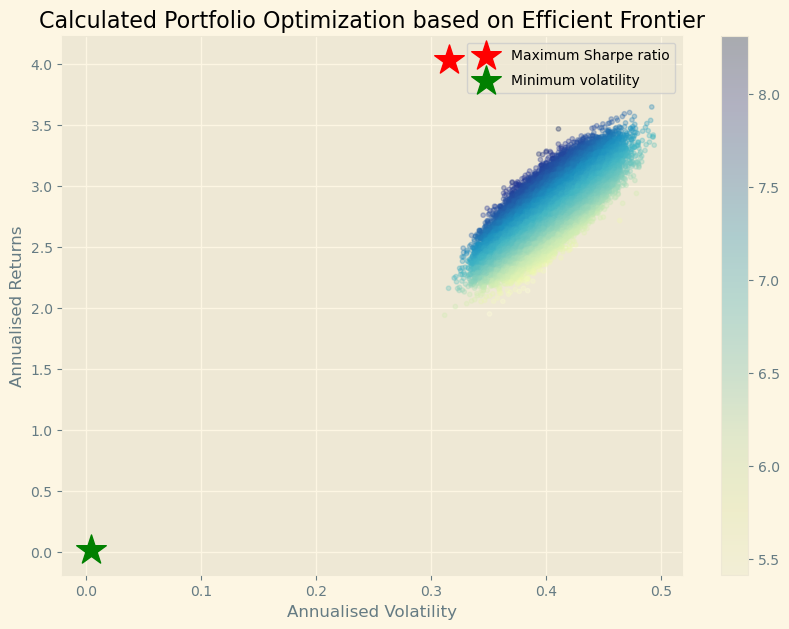

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.77
Annualised Volatility: 0.19
Sharpe Ratio: 9 2


              BTC  ETH  XRP  LTC  BCH  BNB   USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  11.68  0.0  0.0  0.0  0.0  0.0  28.64  0.0  0.0  0.0  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  0.0  0.0  1.5  0.0  0.0  0.0   

             CRO  BTG  USDC  VSYS  DOGE   EGT  VET   BAT  QTUM   DCR  TUSD  \
allocation  7.74  0.0   0.0  4.48   0.0  0.76  0.0  5.02   1.0  3.78   0.0   

            OMG   HT  BTT   PAX  HEDG   RVN   HOT  LSK  BCD  WAVES  NANO  \
allocation  0.0  0.0  0.0  13.2   0.0  4.82  3.29  0.0  0.0    0.0  0.25   

             KMD  DGB   ZRX  
allocation  7.21  0.0  6.63  
--------------------------------------------------------------------------------
Minimum Volatility

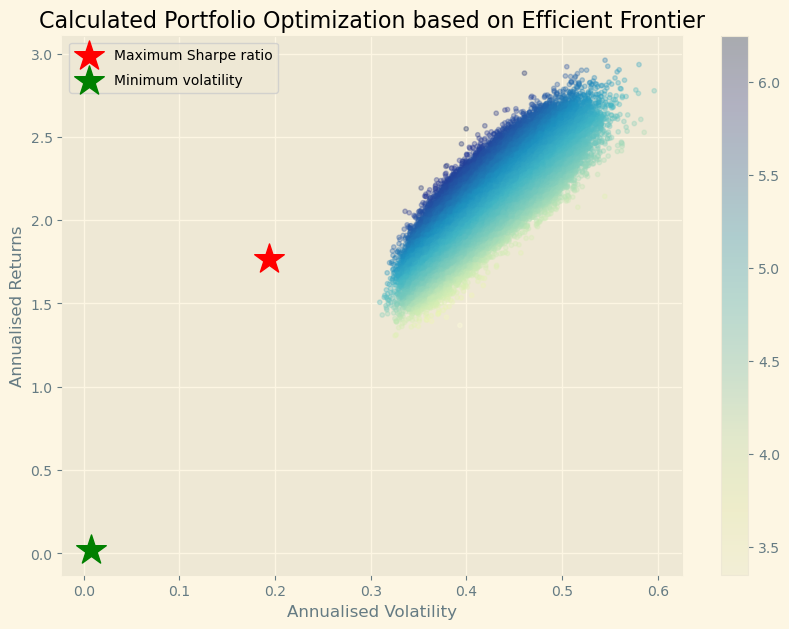

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.84
Annualised Volatility: 0.24
Sharpe Ratio: 8 2


            BTC  ETH   XRP  LTC  BCH   BNB  USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  0.0  0.0  8.29  0.0  0.0  3.85   0.0  0.0  0.0  0.0  0.0  0.0   

            XMR  DASH  LINK   NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR   ZEC  ONT  \
allocation  0.0   0.0   0.0  0.87   1.49   0.0  0.0  0.0  0.0  0.0  2.02  0.0   

              CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  OMG  \
allocation  28.88  0.0   0.0  6.01  10.5  0.0  0.0  0.0  3.03  0.0   0.0  0.0   

             HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO   KMD  DGB  \
allocation  0.0  0.0  27.19   0.0  0.0  0.0  0.0  0.0    0.0   0.0  7.87  0.0   

            ZRX  
allocation  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portf

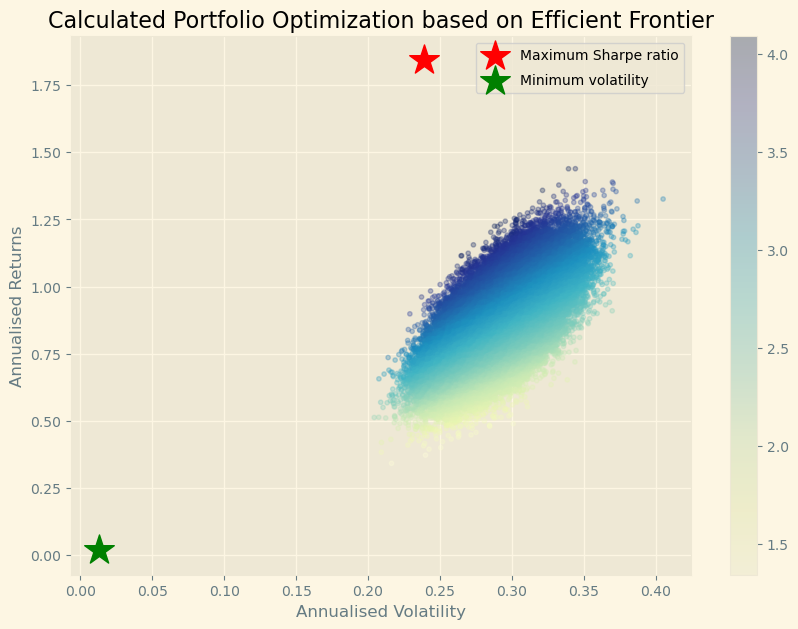

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.16
Annualised Volatility: 0.3
Sharpe Ratio: 7 2


            BTC  ETH    XRP  LTC  BCH  BNB   USDT  EOS  BSV  XLM  TRX   ADA  \
allocation  0.0  0.0  11.73  0.0  0.0  0.0  19.05  0.0  0.0  0.0  0.0  6.68   

            XMR  DASH  LINK  NEO  MIOTA  ATOM    ETC  XTZ  XEM  MKR   ZEC  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  13.18  0.0  0.0  0.0  4.99   

            ONT  CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  7.28  0.0  5.55   

            OMG     HT   BTT  PAX  HEDG  RVN  HOT    LSK  BCD  WAVES  NANO  \
allocation  0.0  10.65  2.14  0.0  4.27  0.0  0.0  14.48  0.0    0.0   0.0   

            KMD  DGB  ZRX  
allocation  0.0  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility 

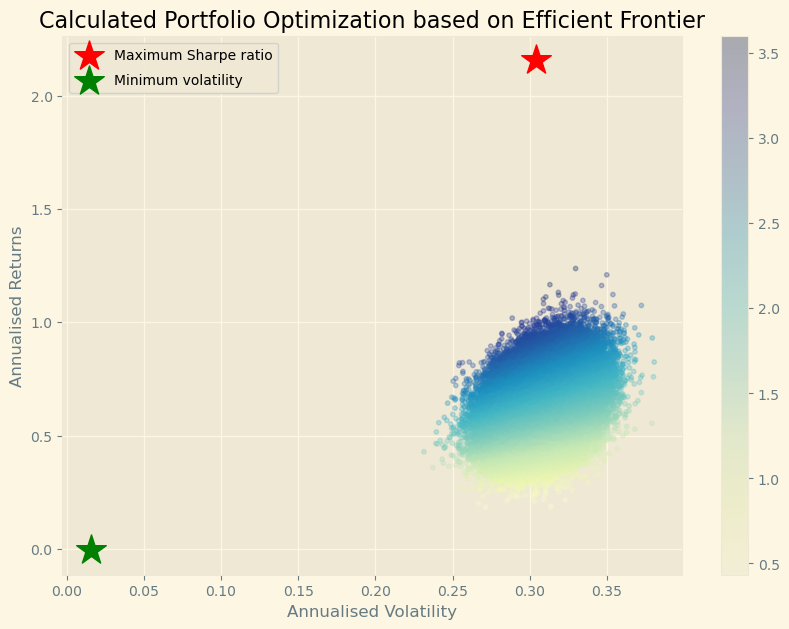

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.37
Annualised Volatility: 0.33
Sharpe Ratio: 1 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  CRO  \
allocation   0.0   0.0  0.0    0.0  4.85  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  OMG     HT  \
allocation  0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  57.95   

            BTT  PAX   HEDG  RVN  HOT  LSK    BCD  WAVES  NANO  KMD  DGB  ZRX  
allocation  0.0  0.0  15.82  0.0  0.0  0.0  21.39    0.0   0.0  0.0  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -

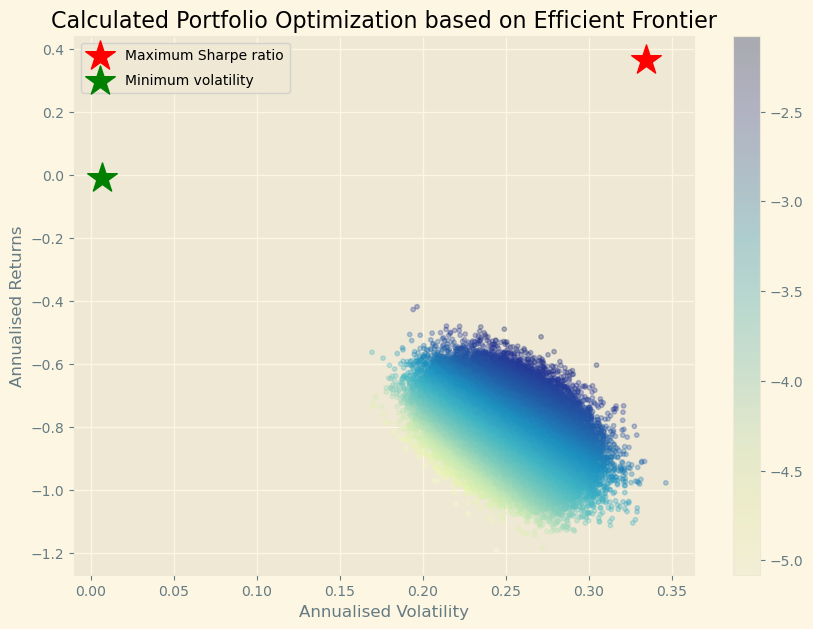

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.19
Annualised Volatility: 0.94
Sharpe Ratio: 1 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  CRO  \
allocation   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM   DCR  TUSD  OMG   HT  \
allocation  0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.72   0.0  0.0  0.0   

            BTT  PAX  HEDG    RVN  HOT  LSK    BCD  WAVES  NANO  KMD  DGB  ZRX  
allocation  0.0  0.0   0.0  76.42  0.0  0.0  22.86    0.0   0.0  0.0  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -

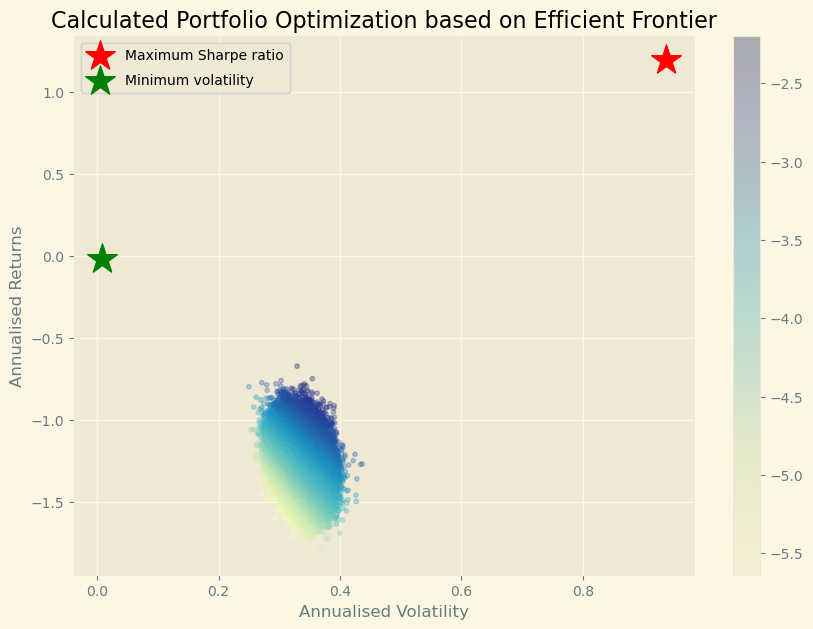

In [13]:

index__ = ["['2020-03-25']", "['2020-04-24']","['2020-05-24']", "['2020-06-23']", "['2020-07-23']", "['2020-08-22']", "['2020-09-21']",
          "['2020-10-21']","['2020-11-20']","['2020-12-20']","['2021-01-19']","['2021-02-18']","['2021-03-20']","['2021-04-19']","['2021-05-19']"]

risk_15 = []
return_15 = []

for index in index__:
    mod_df=pd.DataFrame()
    for i in range(len(top_50)):
        try:
            temp_df=pd.read_csv(f'predicted_prices/{top_50[i]}_{index}.csv').set_index('Date')
            temp_df.rename(columns={"Predicted_Close": f"{top_50[i]}"},inplace=True)
            mod_df=pd.concat([mod_df, temp_df], axis=1)
        except:
            print("Only has one value")

    returns = mod_df.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_portfolios = 100000
    risk_free_rate = 0.05
    annual_returns = (1 + mean_returns)**(ave_trading_days/60) - 1

    results, sdp_max, rp_max, max_sharpe_allocation, sdp_min, rp_min, min_vol_allocation = calculated_ef_with_random(mod_df,mean_returns, cov_matrix, num_portfolios, risk_free_rate, ave_trading_days)
    risk_15.append(sdp_max)
    return_15.append(rp_max)
    
    
    show_graph(results, sdp_max, rp_max, max_sharpe_allocation, sdp_min, rp_min, min_vol_allocation, risk_free_rate)
    plt.pause(0.000005)
    
    
    
    
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


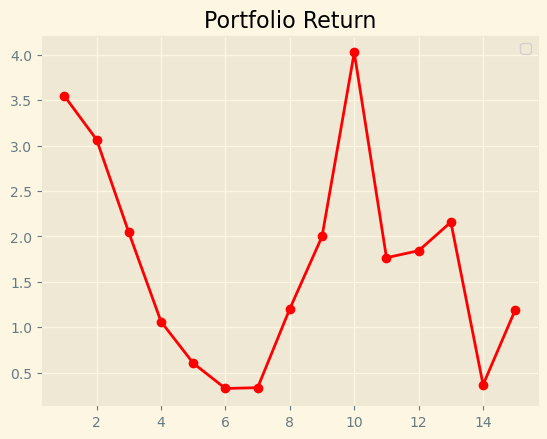

In [16]:
plt.tight_layout()  
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], return_15, color='red', marker='o')     
plt.title("Portfolio Return")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


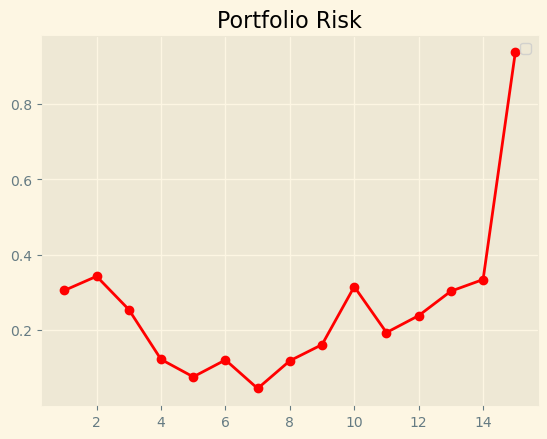

In [15]:
plt.tight_layout()  
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], risk_15, color='red', marker='o')     
plt.title("Portfolio Risk")
plt.legend()
plt.show()